Dataset - "https://www.kaggle.com/datasets/venky73/spam-mails-dataset"

In [46]:
import pandas as pd
from sklearn.metrics import confusion_matrix as cm

In [47]:
df = pd.read_csv("/content/drive/MyDrive/spam_ham_dataset.csv")

In [48]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [49]:
df.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [50]:
y = df['label']

In [51]:
y

0        ham
1        ham
2        ham
3       spam
4        ham
        ... 
5166     ham
5167     ham
5168     ham
5169     ham
5170    spam
Name: label, Length: 5171, dtype: object

In [52]:
x = df['text']

In [53]:
x

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
tfidf = TfidfVectorizer()
from sklearn.model_selection import train_test_split
# x_tfidf = tfidf.fit_transform(x)
x_tfidf = tfidf.fit_transform(x).toarray()

In [56]:
print(x_tfidf)

[[0.09947426 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [57]:
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [60]:
y_pred = model.predict(x_test)

In [61]:
from sklearn import metrics

In [62]:
ac1 = metrics.accuracy_score(y_test, y_pred)
cm1 = cm(y_test,y_pred)
cm1

array([[730,  12],
       [  5, 288]])

In [18]:
# The above code is for TFIDF Vectorizer


In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
count = CountVectorizer()

In [65]:
# from sklearn.model_selection import train_test_split
x_count = count.fit_transform(x).toarray()

In [66]:
print(x_count)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x_count, y, test_size=0.2, random_state=42)

In [68]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [69]:
y_pred = model.predict(x_test)

In [70]:
print(metrics.accuracy_score(y_test, y_pred))

0.9806763285024155


# Using SVM

In [71]:
from sklearn.svm import SVC

In [72]:
svm = SVC(kernel = 'linear')
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [73]:
y_pred = svm.predict(x_test)

In [74]:
from sklearn.metrics import accuracy_score, classification_report

In [75]:
ac2 = accuracy_score(y_test,y_pred)

In [76]:
cr = classification_report(y_test, y_pred)

In [77]:
print(cr)

              precision    recall  f1-score   support

         ham       0.98      0.97      0.98       742
        spam       0.94      0.94      0.94       293

    accuracy                           0.97      1035
   macro avg       0.96      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035



In [78]:
cm2 = cm(y_test,y_pred)

In [79]:
cm2

array([[723,  19],
       [ 17, 276]])

# Using RNN

In [80]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.utils import to_categorical

In [81]:
y.value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [82]:
y_new = df.iloc[:,[1]]

In [83]:
y_new

,label
0,ham
1,ham
2,ham
3,spam
4,ham
...,...
5166,ham
5167,ham
5168,ham
5169,ham


In [84]:
labels = {"spam":0, "ham":1}
y_new['label'] = y_new['label'].map(labels)
y_new = to_categorical(y_new['label'])

<ipython-input-84-577a5e669767>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_new['label'] = y_new['label'].map(labels)


In [85]:
y_new

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [86]:
max_features = 500
max_len = 50
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X, maxlen=max_len)

In [41]:
X

array([[  0,   0,   0, ..., 170,  15,   6],
       [  0,   0,   0, ...,   1, 134, 121],
       [103,  19,  25, ...,  38,  10,   1],
       ...,
       [  0,   0,   0, ...,  37, 224,  42],
       [345,  30,  98, ..., 333,  16, 479],
       [  1,   3,  25, ...,   1, 309,   1]], dtype=int32)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, random_state=42)

In [88]:
embedding_dim = 128
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

In [89]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 5
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)

Epoch 1/5
130/130 - 94s - loss: 0.2795 - accuracy: 0.8791 - val_loss: 0.1414 - val_accuracy: 0.9478 - 94s/epoch - 719ms/step
Epoch 2/5
130/130 - 41s - loss: 0.1222 - accuracy: 0.9579 - val_loss: 0.1282 - val_accuracy: 0.9488 - 41s/epoch - 313ms/step
Epoch 3/5
130/130 - 37s - loss: 0.1084 - accuracy: 0.9620 - val_loss: 0.1220 - val_accuracy: 0.9498 - 37s/epoch - 288ms/step
Epoch 4/5
130/130 - 39s - loss: 0.0869 - accuracy: 0.9693 - val_loss: 0.1217 - val_accuracy: 0.9517 - 39s/epoch - 298ms/step
Epoch 5/5
130/130 - 40s - loss: 0.0761 - accuracy: 0.9720 - val_loss: 0.1176 - val_accuracy: 0.9536 - 40s/epoch - 309ms/step


In [90]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy:', accuracy)

33/33 [==============================] - 1s 28ms/step - loss: 0.1176 - accuracy: 0.9536
Test Accuracy: 0.9536231756210327


In [91]:
labels_rev = {0:"spam", 1:"ham"}

In [104]:
text_spam = "intel i7 with 3090 RTX GeForex"
text_ham = "indian springs this deal is to book the teco pvr revenue . it is my understanding that teco just sends us a check , i haven ' t received an answer as to whether there is a predermined price associated with this deal or if teco just lets us know what we are giving . i can continue to chase this deal down if you need ."
sent_spam = tokenizer.texts_to_sequences([text_spam])
sent_ham = tokenizer.texts_to_sequences([text_ham])
padded_spam = pad_sequences(sent_spam, maxlen=max_len)
padded_ham = pad_sequences(sent_ham, maxlen=max_len)

In [105]:
prediction = model.predict(padded_spam)
predicted_label = labels_rev[prediction.argmax()]
print(f"Your Sentence: '{text_spam}' --> Predicted Sentiment: {predicted_label}")

prediction = model.predict(padded_ham)
predicted_label = labels_rev[prediction.argmax()]
print(f"Your Sentence: '{text_ham}' --> Predicted Sentiment: {predicted_label}")


1/1 [==============================] - 0s 34ms/step
Your Sentence: 'intel i7 with 3090 RTX GeForex' --> Predicted Sentiment: spam
1/1 [==============================] - 0s 36ms/step
Your Sentence: 'indian springs this deal is to book the teco pvr revenue . it is my understanding that teco just sends us a check , i haven ' t received an answer as to whether there is a predermined price associated with this deal or if teco just lets us know what we are giving . i can continue to chase this deal down if you need .' --> Predicted Sentiment: ham


In [94]:
y_pred = model.predict(X_test)

33/33 [==============================] - 1s 18ms/step


In [95]:
from sklearn.metrics import confusion_matrix

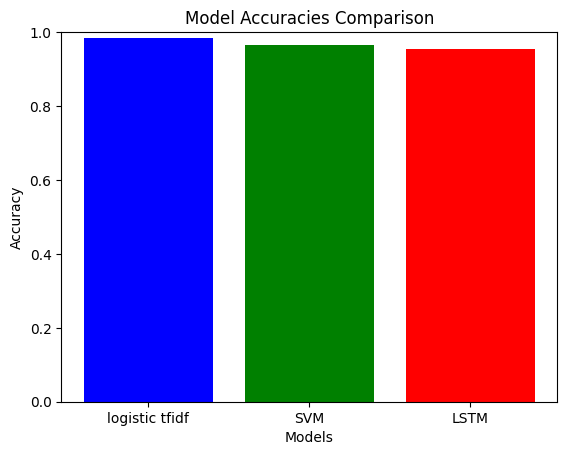

In [97]:
import matplotlib.pyplot as plt

models = ['logistic tfidf', 'SVM', 'LSTM']
accuracies = [ac1,ac2, accuracy]

plt.bar(models, accuracies, color=['blue', 'green', 'red','yellow'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison')
plt.ylim(0, 1)  # Set the y-axis range (0 to 1 for accuracy)
plt.show()